In [2]:
import tensorflow as tf
import numpy as np

In [4]:
x_train = np.load('/home/avaneesh/My Folder/semseter-9/tensorflow/mnist/x_train.npy')
y_train = np.load('/mnist/y_train.npy')
x_test  = np.load('/mnist/x_test.npy')
y_test  = np.load('/mnist/y_test.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/mnist/y_train.npy'

In [3]:
def flat_func(data):
    data1 = []
    for i in range(len(data)):
        data1.append(data[i].flatten())
    return data1

In [4]:
def onehotcode(labels):
    y_true = []
    for i in range(len(labels)):
        list1 = np.zeros(10)
        list1[labels[i]] = 1
        y_true.append(list1)
    return y_true

In [5]:
x_train = flat_func(x_train)
x_test = flat_func(x_test)
y_train_label = onehotcode(y_train)
y_test_label  = onehotcode(y_test)

### Helper
### INIT Weights
### INIT Bias
### CONV 2d
### Polling

In [6]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [7]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

In [8]:
def conv2d(x,W):
    # x----> [batch,H,W,Channels]
    # W----> [filter H, filter W , Channels IN, Channels OUT]
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [9]:
def max_pool_2by2(x):
    # x---> [batch,H,W,Channels]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [10]:
# Convolutional Layer
def convolutional_layer(input_x,shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [11]:
# Normal (fully connected)
def normal_full_layer(input_layer,size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size,size])
    b = init_bias([size])
    return tf.matmul(input_layer,W)+b

In [12]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [13]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [14]:
x_image = tf.reshape(x,[-1,28,28,1])

In [15]:
convo_1 = convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [16]:
#convo_2 = convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
#convo_2_pooling = max_pool_2by2(convo_2)

In [17]:
convo_2_flat = tf.reshape(convo_1_pooling,[-1,14*14*32])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [18]:
#Dropout
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [19]:
y_pred = normal_full_layer(full_one_dropout,10)

In [20]:
#Lost Function
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [22]:
init = tf.global_variables_initializer()

In [23]:
saver = tf.train.Saver()

In [24]:
steps = 1001
with tf.Session() as sess:
    sess.run(init)
    j=0
    k=0
    for i in range(steps):
        j = j+50
        batch_x,batch_y = x_train[k*50:j],y_train_label[k*50:j]
        k = k+1
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        #3conv_result= (sess.run(convo_1,feed_dict={x:batch_x}))
        #conv_pooling_result= (sess.run(convo_1_pooling,feed_dict={x:batch_x}))
        
        if i%1000 == 0:
            j=0
            k=0
        
        if i%100 == 0:
            print("ON STEP:{}".format(i),end=' ')
            print("------------>",end=' ')
            print("ACCURACY: ",end=' ')
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:x_test,y_true:y_test_label,hold_prob:1.0}))
    saver.save(sess,'digit_model/weights_v1.ckpt')
    #result = sess.run(y_pred,feed_dict={x:[data],hold_prob:1.0})

ON STEP:0 ------------> ACCURACY:  0.171
ON STEP:100 ------------> ACCURACY:  0.9121
ON STEP:200 ------------> ACCURACY:  0.9158
ON STEP:300 ------------> ACCURACY:  0.951
ON STEP:400 ------------> ACCURACY:  0.9562
ON STEP:500 ------------> ACCURACY:  0.9596
ON STEP:600 ------------> ACCURACY:  0.9575
ON STEP:700 ------------> ACCURACY:  0.9621
ON STEP:800 ------------> ACCURACY:  0.9633
ON STEP:900 ------------> ACCURACY:  0.9661
ON STEP:1000 ------------> ACCURACY:  0.967


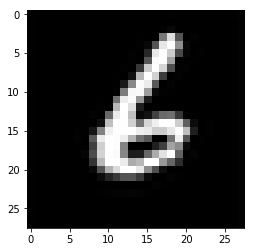

In [26]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
pil_im = Image.open('6.jpeg')
img = pil_im.resize((28,28),Image.ANTIALIAS)
imgray = img.convert('L')
data_input = np.array(imgray)
data = data_input.flatten()
data = 255-data
plt.imshow(data.reshape(28,28),cmap='gist_gray')
plt.show()

In [27]:
with tf.Session() as sess:
    saver.restore(sess,'digit_model/weights_v1.ckpt')
    conv_result= (sess.run(convo_1,feed_dict={x:[data]}))
    conv_pooling_result= (sess.run(convo_1_pooling,feed_dict={x:[data]}))
    prob = sess.run(y_pred,feed_dict={x:[data],hold_prob:1.0})
    pred_value=list(prob[0]).index(max(prob[0]))
    print(prob)
    print("Predicted value:{}".format(pred_value))
    

INFO:tensorflow:Restoring parameters from digit_model/weights_v1.ckpt
[[  2.8307805 -20.74405    28.815035  -32.0798     33.27819    22.188658
  135.80605   -60.08353   -25.823112  -11.104622 ]]
Predicted value:6


In [29]:
conv_result.shape

(1, 28, 28, 32)

In [31]:
conv_pooling_result.shape

(1, 14, 14, 32)

In [53]:
conv_result[0][0][0][0]

0.0

In [83]:
#reshaping data into 28X28 output
input_data = []
data = []
for k in range(0,32):
    data = []
    for i in range(0,28):
        
        for j in range(0,28):
            data.append(conv_result[0][i][j][k])
    input_data.append(data)
len(input_data[0])
input_array = np.asarray(input_data,float)
# reshaping data into 14X14 output
pooling_res = []
data = []
for k in range(0,32):
    data = []
    for i in range(0,14):
        
        for j in range(0,14):
            data.append(conv_pooling_result[0][i][j][k])
    pooling_res.append(data)
len(pooling_res[0])
pooling_array = np.asarray(pooling_res,float)

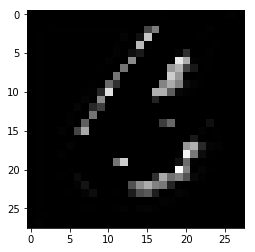

Convolution result


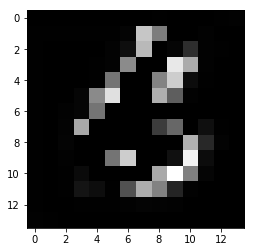

Max pooling result


In [86]:
#after convolution layer applied
plt.imshow(input_array[28].reshape(28,28),cmap='gist_gray')
plt.show()
print("Convolution result")
#after max_pooling applied
plt.imshow(pooling_array[28].reshape(14,14),cmap='gist_gray')
plt.show()
print("Max pooling result")